In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:
data = pd.read_excel("data1.xlsx")
print(data)

       id                   date_v   reg  yukh   power  temp w_status
0       1  2024-01-17 18:45:00.000  4214  6047  617000     0     rain
1       2  2024-01-17 19:00:00.000  4214  6046  617000     0     rain
2       3  2024-01-17 19:15:00.000  4213  6046  617000     0     rain
3       4  2024-01-17 19:30:00.000  4213  6045  616000     0     rain
4       5  2024-01-17 19:45:00.000  4212  6046  616000     0     rain
..    ...                      ...   ...   ...     ...   ...      ...
873  2902  2024-01-26 23:30:00.000  4149  6006  303000     0        0
874  2904  2024-01-26 23:45:00.000  4148  6005  303000     0        0
875  2907  2024-01-27 00:00:00.000  4149  6004  303000     0        0
876  2909  2024-01-27 00:15:00.000  4149  6005  301000     0        0
877  2911  2024-01-27 00:30:00.000  4150  6005  302000     0        0

[878 rows x 7 columns]


In [ ]:
data=data.drop(["id","temp","w_status"],axis=1)
print(data)

                      date_v   reg  yukh   power
0    2024-01-17 18:45:00.000  4214  6047  617000
1    2024-01-17 19:00:00.000  4214  6046  617000
2    2024-01-17 19:15:00.000  4213  6046  617000
3    2024-01-17 19:30:00.000  4213  6045  616000
4    2024-01-17 19:45:00.000  4212  6046  616000
..                       ...   ...   ...     ...
873  2024-01-26 23:30:00.000  4149  6006  303000
874  2024-01-26 23:45:00.000  4148  6005  303000
875  2024-01-27 00:00:00.000  4149  6004  303000
876  2024-01-27 00:15:00.000  4149  6005  301000
877  2024-01-27 00:30:00.000  4150  6005  302000

[878 rows x 4 columns]


In [ ]:
data['date_v'] = pd.to_datetime(data['date_v'])
data['unix_time'] = data['date_v'].apply(lambda x: int((x - datetime(1970, 1, 1)).total_seconds()))
data=data.drop("date_v",axis=1)
print(data)


      reg  yukh   power   unix_time
0    4214  6047  617000  1705517100
1    4214  6046  617000  1705518000
2    4213  6046  617000  1705518900
3    4213  6045  616000  1705519800
4    4212  6046  616000  1705520700
..    ...   ...     ...         ...
873  4149  6006  303000  1706311800
874  4148  6005  303000  1706312700
875  4149  6004  303000  1706313600
876  4149  6005  301000  1706314500
877  4150  6005  302000  1706315400

[878 rows x 4 columns]


In [ ]:

data=data[(data != 0).all(axis=1)]
print(data)

      reg  yukh   power   unix_time
0    4214  6047  617000  1705517100
1    4214  6046  617000  1705518000
2    4213  6046  617000  1705518900
3    4213  6045  616000  1705519800
4    4212  6046  616000  1705520700
..    ...   ...     ...         ...
873  4149  6006  303000  1706311800
874  4148  6005  303000  1706312700
875  4149  6004  303000  1706313600
876  4149  6005  301000  1706314500
877  4150  6005  302000  1706315400

[876 rows x 4 columns]


In [ ]:
data=data.dropna()
print(data)

      reg  yukh   power   unix_time
0    4214  6047  617000  1705517100
1    4214  6046  617000  1705518000
2    4213  6046  617000  1705518900
3    4213  6045  616000  1705519800
4    4212  6046  616000  1705520700
..    ...   ...     ...         ...
873  4149  6006  303000  1706311800
874  4148  6005  303000  1706312700
875  4149  6004  303000  1706313600
876  4149  6005  301000  1706314500
877  4150  6005  302000  1706315400

[876 rows x 4 columns]


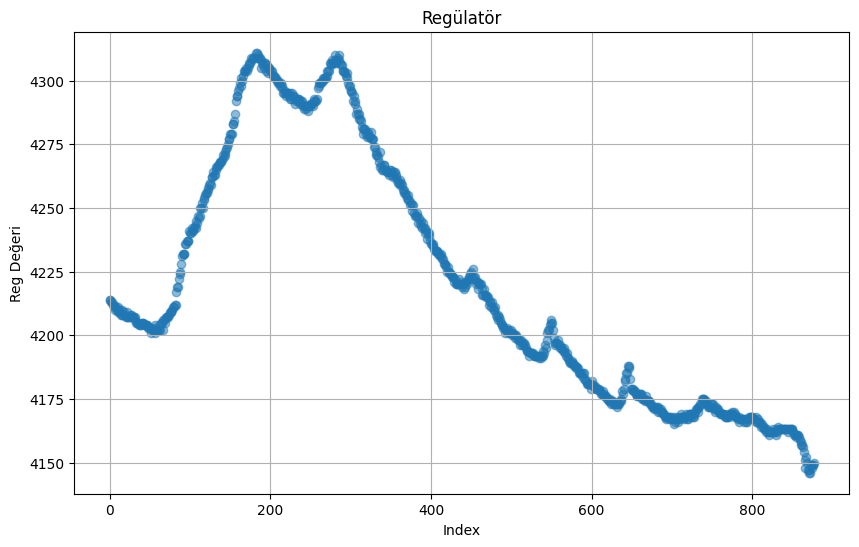

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['reg'], alpha=0.5)
plt.title('Regülatör')
plt.xlabel('Index')
plt.ylabel('Reg Değeri')
plt.grid(True)
plt.show()

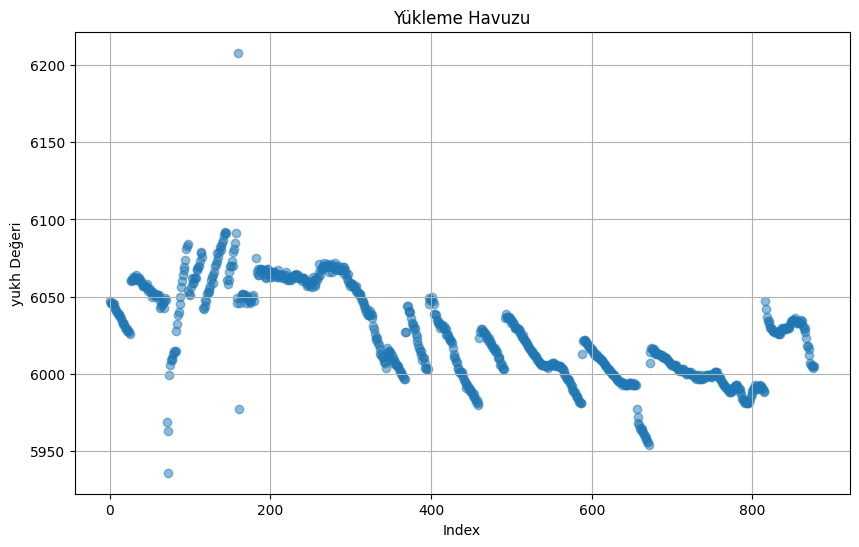

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['yukh'], alpha=0.5)
plt.title('Yükleme Havuzu')
plt.xlabel('Index')
plt.ylabel('yukh Değeri')
plt.grid(True)
plt.show()

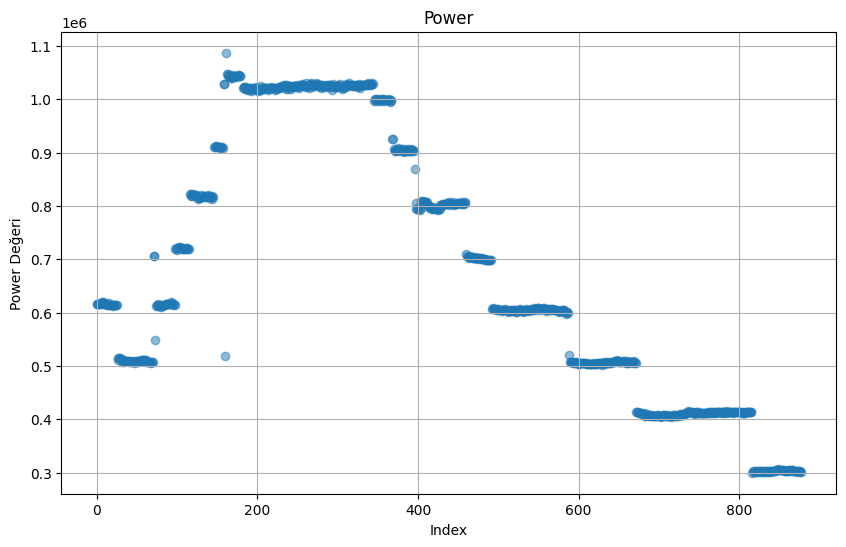

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['power'], alpha=0.5)
plt.title('Power')
plt.xlabel('Index')
plt.ylabel('Power Değeri')
plt.grid(True)
plt.show()

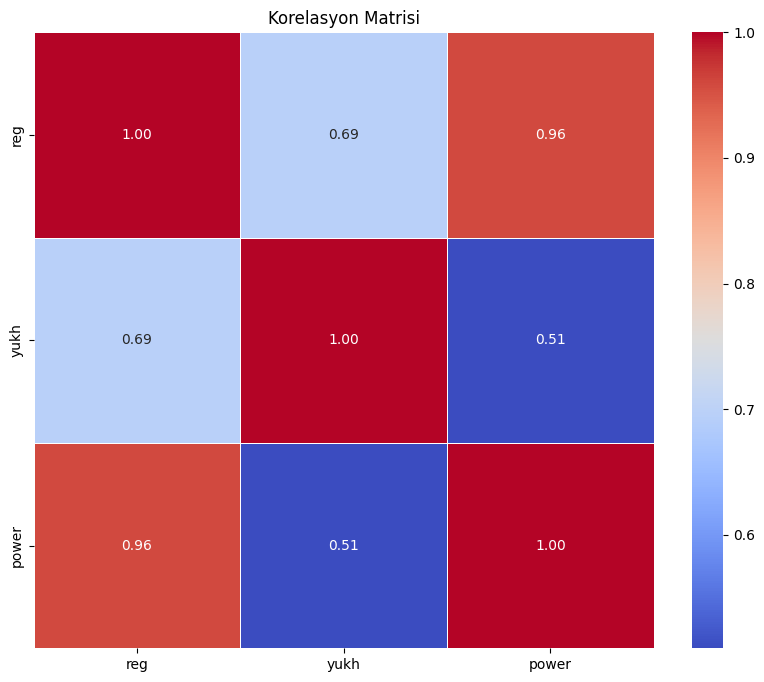

In [ ]:
yeni_data=data.drop(["unix_time"],axis=1)
correlation_matrix = yeni_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

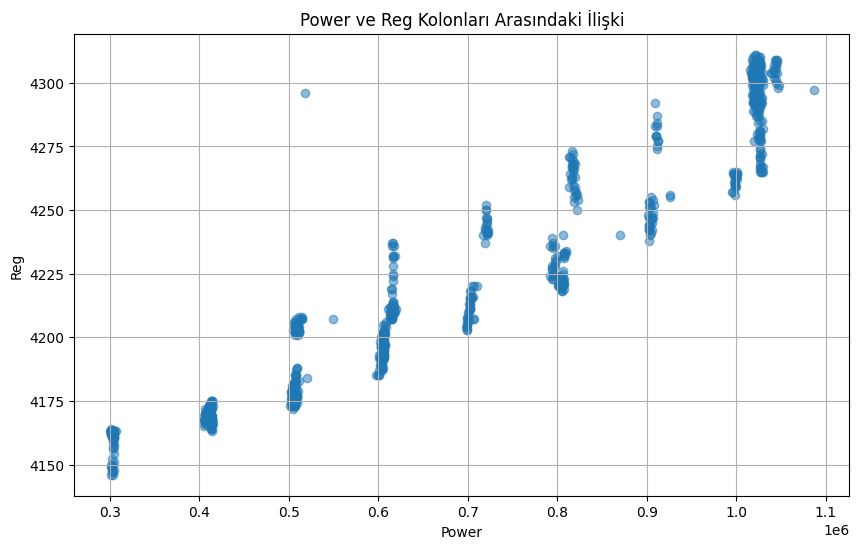

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['power'], data['reg'], alpha=0.5)
plt.title('Power ve Reg Kolonları Arasındaki İlişki')
plt.xlabel('Power')
plt.ylabel('Reg')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from keras.models import save_model

# Veriyi yükleme ve gereksiz sütunları kaldırma
data = pd.read_excel("test.xlsx")
data = data.drop(["id", "temp", "w_status"], axis=1)

# 'date' sütununu datetime formatına çevirme
data['date_v'] = pd.to_datetime(data['date_v'])

# 'date' sütununu Unix zaman damgasına çevirme
data['unix_time'] = data['date_v'].apply(lambda x: int((x - datetime(1970, 1, 1)).total_seconds()))

# Gereksiz sütunu ve orijinal tarih sütununu kaldırma
data = data.drop(["date_v"], axis=1)

# Sadece 'yukh' sütununu MinMaxScaler ile ölçeklendirme
scaler_yukh = MinMaxScaler()
data['yukh_scaled'] = scaler_yukh.fit_transform(data[['yukh']])
data=data.drop(["yukh"],axis=1)

# Zaman serisi formatına dönüştürme
def create_time_series_data(data, window_size):
    X, y = [], []

    for i in range(len(data) - window_size):
        # Pencere boyutu kadar veriyi seçme
        window = data['yukh_scaled'][i:i+window_size].values
        target = data['yukh_scaled'][i + window_size]

        X.append(window)
        y.append(target)

    return np.array(X), np.array(y)

# Pencere boyutunu belirleme
window_size = 10

# Giriş ve hedef verilerini oluşturma
X, y = create_time_series_data(data, window_size)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Modeli oluşturma
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))


# Test seti üzerinde tahmin yapma
test_predictions = model.predict(X_test)
r2_test = r2_score(y_test, test_predictions)

print(f'Modelin Test R-kare skoru: {r2_test}')


Epoch 1/100
292/292 [==============================] - 10s 21ms/step - loss: 0.0095 - val_loss: 0.0015
Epoch 2/100
292/292 [==============================] - 5s 16ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 3/100
292/292 [==============================] - 5s 16ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 4/100
292/292 [==============================] - 6s 19ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 5/100
292/292 [==============================] - 5s 16ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 6/100
292/292 [==============================] - 6s 19ms/step - loss: 9.7229e-04 - val_loss: 0.0012
Epoch 7/100
292/292 [==============================] - 5s 16ms/step - loss: 7.8478e-04 - val_loss: 9.2698e-04
Epoch 8/100
292/292 [==============================] - 5s 16ms/step - loss: 7.0852e-04 - val_loss: 9.4743e-04
Epoch 9/100
292/292 [==============================] - 6s 19ms/step - loss: 6.7485e-04 - val_loss: 9.0671e-04
Epoch 10/100
292/292 [==============================]

In [ ]:
# Eğitilmiş modeli kaydetme
save_model(model, 'modelim.h5')


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Veriyi yükleme ve gereksiz sütunları kaldırma
data = pd.read_excel("data1.xlsx")
data = data.drop(["id", "temp", "w_status"], axis=1)

# 'date' sütununu datetime formatına çevirme
data['date_v'] = pd.to_datetime(data['date_v'])

# 'date' sütununu Unix zaman damgasına çevirme
data['unix_time'] = data['date_v'].apply(lambda x: int((x - datetime(1970, 1, 1)).total_seconds()))



# Gereksiz sütunu ve orijinal tarih sütununu kaldırma
data = data.drop(["date_v"], axis=1)

# Sadece 'yukh' sütununu MinMaxScaler ile ölçeklendirme
scaler_yukh = MinMaxScaler()
data['yukh_scaled'] = scaler_yukh.fit_transform(data[['yukh']])
data=data.drop(["yukh"],axis=1)

# Zaman serisi formatına dönüştürme
def create_time_series_data(data, window_size):
    X, y = [], []

    for i in range(len(data) - window_size):
        # Pencere boyutu kadar veriyi seçme
        window = data['yukh_scaled'][i:i+window_size].values
        target = data['yukh_scaled'][i + window_size]

        X.append(window)
        y.append(target)

    return np.array(X), np.array(y)

# Pencere boyutunu belirleme
window_size = 10

# Giriş ve hedef verilerini oluşturma
X, y = create_time_series_data(data, window_size)

# Modeli yükleme
model = load_model('modelim.h5')

# Test seti üzerinde tahmin yapma
test_predictions = model.predict(X)
r2_test = r2_score(y, test_predictions)

print(f'Modelin Test R-kare skoru: {r2_test}')


28/28 [==============================] - 1s 7ms/step
Modelin Test R-kare skoru: 0.7479829816074353


In [ ]:
# Gerçek 'yukh' değerlerini al
yukh_original = scaler_yukh.inverse_transform(y.reshape(-1, 1))

# Tahmin edilen 'yukh' değerlerini ölçeklendirmeyi tersine çevirme
predicted_yukh_original = scaler_yukh.inverse_transform(test_predictions)

# Veri çerçevesi oluşturma
result_df = pd.DataFrame({'Gerçek Yukh': yukh_original.flatten(), 'Tahmin Yukh': predicted_yukh_original.flatten()})

# Sonuçları ekrana yazdırma
print(result_df)

# Veriyi Excel dosyasına yazma
result_df.to_excel("gercek_tahmin_yukh.xlsx", index=False)


     Gerçek Yukh  Tahmin Yukh
0         6039.0  6042.869629
1         6038.0  6041.905273
2         6039.0  6040.745605
3         6037.0  6042.174805
4         6036.0  6039.492188
..           ...          ...
863       6006.0  5992.593750
864       6005.0  5992.233398
865       6004.0  5991.550781
866       6005.0  5990.577148
867       6005.0  5992.703125

[868 rows x 2 columns]


Korelasyon Tablosu:
              Gerçek Yukh  Tahmin Yukh
Gerçek Yukh     1.000000     0.897769
Tahmin Yukh     0.897769     1.000000


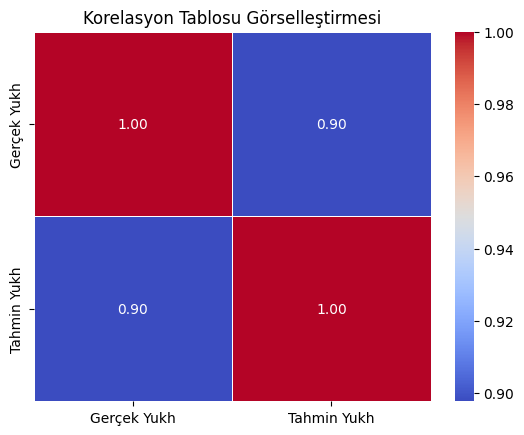

In [ ]:
# Korelasyon tablosunu hesapla
correlation_table = result_df.corr()

# Korelasyon tablosunu ekrana yazdır
print("Korelasyon Tablosu:\n", correlation_table)

# Korelasyon tablosunu Excel dosyasına yaz
correlation_table.to_excel("korelasyon_tablosu.xlsx")
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon tablosunu görselleştir
sns.heatmap(correlation_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Korelasyon Tablosu Görselleştirmesi")
plt.show()


In [ ]:
import pandas as pd
from datetime import timedelta

# Excel dosyasını oku
df = pd.read_excel('data1.xlsx')

# 'date_v' kolonundaki değerlere 1 saat ekle
df['date_v'] = pd.to_datetime(df['date_v']) + timedelta(hours=1)

# Güncellenmiş verileri başka bir Excel dosyasına kaydet

df.to_excel('guncellenmis_veriseti.xlsx', index=False)

sondata= pd.read_excel('guncellenmis_veriseti.xlsx')
print(sondata)

       id              date_v   reg  yukh   power  temp w_status
0       1 2024-01-17 19:45:00  4214  6047  617000     0     rain
1       2 2024-01-17 20:00:00  4214  6046  617000     0     rain
2       3 2024-01-17 20:15:00  4213  6046  617000     0     rain
3       4 2024-01-17 20:30:00  4213  6045  616000     0     rain
4       5 2024-01-17 20:45:00  4212  6046  616000     0     rain
..    ...                 ...   ...   ...     ...   ...      ...
873  2902 2024-01-27 00:30:00  4149  6006  303000     0        0
874  2904 2024-01-27 00:45:00  4148  6005  303000     0        0
875  2907 2024-01-27 01:00:00  4149  6004  303000     0        0
876  2909 2024-01-27 01:15:00  4149  6005  301000     0        0
877  2911 2024-01-27 01:30:00  4150  6005  302000     0        0

[878 rows x 7 columns]


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from sklearn.metrics import r2_score

# Excel dosyasını oku
df = pd.read_excel('data1.xlsx')

# 'date_v' kolonundaki değerlere 1 saat ekle
df['date_v'] = pd.to_datetime(df['date_v']) + timedelta(hours=1)

# Güncellenmiş verileri başka bir Excel dosyasına kaydet
df.to_excel('guncellenmis_veriseti.xlsx', index=False)

# Güncellenmiş verileri oku
sondata = pd.read_excel('guncellenmis_veriseti.xlsx')

# Veriyi yükleme ve gereksiz sütunları kaldırma
data = sondata.copy()  # Veriyi kopyalayarak asıl veriyi değiştirmeyi önle
data = data.drop(["id", "temp", "w_status"], axis=1)

# 'date' sütununu datetime formatına çevirme
data['date_v'] = pd.to_datetime(data['date_v'])

# 'date' sütununu Unix zaman damgasına çevirme
data['unix_time'] = data['date_v'].apply(lambda x: int((x - datetime(1970, 1, 1)).total_seconds()))

# Gereksiz sütunu ve orijinal tarih sütununu kaldırma
data = data.drop(["date_v"], axis=1)

# Sadece 'yukh' sütununu MinMaxScaler ile ölçeklendirme
scaler_yukh = MinMaxScaler()
data['yukh_scaled'] = scaler_yukh.fit_transform(data[['yukh']])
data = data.drop(["yukh"], axis=1)

# Zaman serisi formatına dönüştürme
def create_time_series_data(data, window_size):
    X, y = [], []

    for i in range(len(data) - window_size):
        # Pencere boyutu kadar veriyi seçme
        window = data['yukh_scaled'][i:i+window_size].values
        target = data['yukh_scaled'][i + window_size]

        X.append(window)
        y.append(target)

    return np.array(X), np.array(y)

# Pencere boyutunu belirleme
window_size = 10

# Giriş ve hedef verilerini oluşturma
X, y = create_time_series_data(data, window_size)

# Modeli yükleme
model = load_model('modelim.h5')

# Test seti üzerinde tahmin yapma
test_predictions = model.predict(X)
r2_test = r2_score(y, test_predictions)

print(f'Modelin Test R-kare skoru: {r2_test}')

# Tahmin edilen 'yukh' değerlerini ölçeklendirmeyi tersine çevirme
predicted_yukh_original = scaler_yukh.inverse_transform(test_predictions)

# 'guncellenmis_veriseti' veri çerçevesine tahmin edilen 'yukh' değerlerini ekleme
sondata['tahmin_yukh'] = np.concatenate((np.full(window_size, np.nan), predicted_yukh_original.flatten()))

# Veri çerçevesini ekrana yazdırma
print(sondata)

# Veriyi Excel dosyasına yazma
sondata.to_excel("guncellenmis_veriseti_tahmin.xlsx", index=False)


28/28 [==============================] - 1s 7ms/step
Modelin Test R-kare skoru: 0.7479829816074353
       id              date_v   reg  yukh   power  temp w_status  tahmin_yukh
0       1 2024-01-17 19:45:00  4214  6047  617000     0     rain          NaN
1       2 2024-01-17 20:00:00  4214  6046  617000     0     rain          NaN
2       3 2024-01-17 20:15:00  4213  6046  617000     0     rain          NaN
3       4 2024-01-17 20:30:00  4213  6045  616000     0     rain          NaN
4       5 2024-01-17 20:45:00  4212  6046  616000     0     rain          NaN
..    ...                 ...   ...   ...     ...   ...      ...          ...
873  2902 2024-01-27 00:30:00  4149  6006  303000     0        0  5992.593750
874  2904 2024-01-27 00:45:00  4148  6005  303000     0        0  5992.233398
875  2907 2024-01-27 01:00:00  4149  6004  303000     0        0  5991.550781
876  2909 2024-01-27 01:15:00  4149  6005  301000     0        0  5990.577148
877  2911 2024-01-27 01:30:00  4150  6005  

In [ ]:
#oluşturulan veri setinde tarihlere gerçek verilerin kaydedilmesi
# Veri setlerini oku
data1 = pd.read_excel('data1 (1).xlsx')
guncellenmis_veri = pd.read_excel('guncellenmis_veriseti_tahmin (1).xlsx')

# Tarih kontrolü yaparak güncelleme işlemini gerçekleştir
for index, row in data1.iterrows():
    tarih = row['date_v']
    guncellenmis_veri_index = guncellenmis_veri[guncellenmis_veri['date_v'] == tarih].index

    if not guncellenmis_veri_index.empty:
        guncellenmis_veri.loc[guncellenmis_veri_index, 'yukh'] = row['yukh']

# Güncellenmiş veriyi kaydet
guncellenmis_veri.to_excel('güncellenmiş_veri_tahmin_tablosu_son_hali.xlsx', index=False)
